In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as st
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import locale

In [2]:
maart_2022=pd.read_csv('Energie_en_vermogen_Maand (1).csv',sep=';')
maart_2022.columns=['Datum','Opbrengst']
maart_2022.dropna(inplace=True)

In [3]:
april_2022=pd.read_csv('Energie_en_vermogen_Maand (2).csv',sep=';')
april_2022.columns=['Datum','Opbrengst']
mei_2022=pd.read_csv('Energie_en_vermogen_Maand (3).csv',sep=';')
mei_2022.columns=['Datum','Opbrengst']
juni_2022=pd.read_csv('Energie_en_vermogen_Maand (4).csv',sep=';')
juni_2022.columns=['Datum','Opbrengst']
juli_2022=pd.read_csv('Energie_en_vermogen_Maand (5).csv',sep=';')
juli_2022.columns=['Datum','Opbrengst']
augustus_2022=pd.read_csv('Energie_en_vermogen_Maand (6).csv',sep=';')
augustus_2022.columns=['Datum','Opbrengst']
september_2022=pd.read_csv('Energie_en_vermogen_Maand (7).csv',sep=';')
september_2022.columns=['Datum','Opbrengst']
oktober_2022=pd.read_csv('Energie_en_vermogen_Maand (8).csv',sep=';')
oktober_2022.columns=['Datum','Opbrengst']
november_2022=pd.read_csv('Energie_en_vermogen_Maand (9).csv',sep=';')
november_2022.columns=['Datum','Opbrengst']
december_2022=pd.read_csv('Energie_en_vermogen_Maand (10).csv',sep=';')
december_2022.columns=['Datum','Opbrengst']
januari_2023=pd.read_csv('Energie_en_vermogen_Maand (11).csv',sep=';')
januari_2023.columns=['Datum','Opbrengst']
februari_2023=pd.read_csv('Energie_en_vermogen_Maand (12).csv',sep=';')
februari_2023.columns=['Datum','Opbrengst']
maart_2023=pd.read_csv('Energie_en_vermogen_Maand (13).csv',sep=';')
maart_2023.columns=['Datum','Opbrengst']
april_2023=pd.read_csv('Energie_en_vermogen_Maand (14).csv',sep=';')
april_2023.columns=['Datum','Opbrengst']
mei_2023=pd.read_csv('Energie_en_vermogen_Maand (15).csv',sep=';')
mei_2023.columns=['Datum','Opbrengst']
juni_2023=pd.read_csv('Energie_en_vermogen_Maand (16).csv',sep=';')
juni_2023.columns=['Datum','Opbrengst']
juli_2023=pd.read_csv('Energie_en_vermogen_Maand (17).csv',sep=';')
juli_2023.columns=['Datum','Opbrengst']
augustus_2023=pd.read_csv('Energie_en_vermogen_Maand (18).csv',sep=';')
augustus_2023.columns=['Datum','Opbrengst']

In [4]:
df=pd.concat([maart_2022,april_2022,mei_2022,juni_2022,juli_2022,augustus_2022,september_2022,
                 oktober_2022,november_2022,december_2022,januari_2023,februari_2023,maart_2023,april_2023,
                  mei_2023,juni_2023,juli_2023,augustus_2023],ignore_index=True)

df.Opbrengst=df.Opbrengst.str.replace(',','.').astype(float)

index_min=df['Opbrengst'].idxmin()
index_max=df.Opbrengst.idxmax()

df=df.drop(df.index[[index_min,index_max]])
df =df.reset_index(drop=True)

In [5]:
df.Datum=pd.to_datetime(df.Datum,format="%d-%m-%y")

In [6]:
df['Jaar']=df['Datum'].dt.year
df['Maand']=df['Datum'].dt.month

GemiddeldeVermogenPerMaandPerJaar=df.groupby(['Jaar','Maand'],as_index=False)['Opbrengst'].mean()
GemiddeldeVermogenPerMaand=df.groupby('Maand',as_index=False)['Opbrengst'].mean()
GemiddeldeVermogenPerMaand.dtypes

Maand          int32
Opbrengst    float64
dtype: object

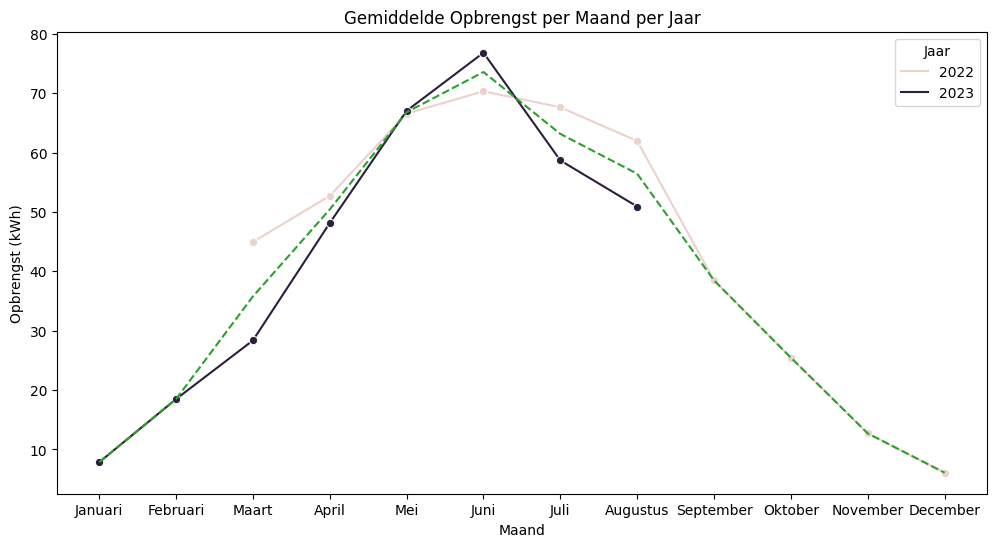

In [7]:
maandnamen = [
    'Januari', 'Februari', 'Maart', 'April', 'Mei', 'Juni',
    'Juli', 'Augustus', 'September', 'Oktober', 'November', 'December'
]

GemiddeldeVermogenPerMaandPerJaar['Maand'] = GemiddeldeVermogenPerMaandPerJaar['Maand'].map(lambda x: maandnamen[x-1])
GemiddeldeVermogenPerMaand['Maand'] = GemiddeldeVermogenPerMaand['Maand'].map(lambda x: maandnamen[x-1])

# Pas de volgorde van de maanden aan
maand_volgorde = pd.CategoricalDtype(categories=maandnamen, ordered=True)
GemiddeldeVermogenPerMaandPerJaar['Maand'] = GemiddeldeVermogenPerMaandPerJaar['Maand'].astype(maand_volgorde)
GemiddeldeVermogenPerMaand['Maand'] = GemiddeldeVermogenPerMaand['Maand'].astype(maand_volgorde)

# Sorteer de DataFrame op de maandvolgorde
GemiddeldeVermogenPerMaandPerJaar.sort_values(['Jaar', 'Maand'], inplace=True)
GemiddeldeVermogenPerMaand.sort_values('Maand')

# Plot de gegevens met seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(data=GemiddeldeVermogenPerMaandPerJaar, x='Maand', y='Opbrengst', hue='Jaar', marker='o')
sns.lineplot(data=GemiddeldeVermogenPerMaand, x='Maand', y='Opbrengst',linestyle='--')
# Titels en labels
plt.title('Gemiddelde Opbrengst per Maand per Jaar')
plt.xlabel('Maand')
plt.ylabel('Opbrengst (kWh)')

# Voeg een legenda toe
plt.legend(title='Jaar')

# Toon de plot
plt.show()